In [1]:
import re
import pandas as pd 

In [2]:
f = open('WhatsApp Chat with Cse 8A.txt', 'r', encoding='utf-8') 

In [3]:
data = f.read()

In [4]:
print(data)

03/10/2022, 2:37 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
03/10/2022, 12:22 pm - ~ Kirat Batra created group "Btech cse 3sem"
03/10/2022, 2:37 pm - 🏠 joined using this group's invite link
03/10/2022, 3:02 pm - +91 78277 22565 joined using this group's invite link
03/10/2022, 3:03 pm - +91 99586 22186 joined using this group's invite link
03/10/2022, 3:37 pm - +91 83680 83904 joined using this group's invite link
03/10/2022, 4:23 pm - +91 70613 53015 joined using this group's invite link
03/10/2022, 4:45 pm - Lalita joined using this group's invite link
03/10/2022, 4:47 pm - +91 96252 01291 joined using this group's invite link
03/10/2022, 4:48 pm - +91 91401 55918 joined using this group's invite link
03/10/2022, 5:33 pm - +91 87663 74077 joined using this group's invite link
03/10/2022, 5:46 pm - +91 89294 44030: Thanks for adding me too
03/10/2022, 6:18 pm - +91 95823 40735 joined using this group's inv

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[ap]m\s-\s'


In [6]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 '~\u202fKirat Batra created group "Btech cse 3sem"\n',
 "🏠 joined using this group's invite link\n",
 "+91 78277 22565 joined using this group's invite link\n",
 "+91 99586 22186 joined using this group's invite link\n",
 "+91 83680 83904 joined using this group's invite link\n",
 "+91 70613 53015 joined using this group's invite link\n",
 "Lalita joined using this group's invite link\n",
 "+91 96252 01291 joined using this group's invite link\n",
 "+91 91401 55918 joined using this group's invite link\n",
 "+91 87663 74077 joined using this group's invite link\n",
 '+91 89294 44030: Thanks for adding me too\n',
 "+91 95823 40735 joined using this group's invite link\n",
 "Anjali joined using this group's invite link\n",
 "+91 84481 37090 joined using this group's invite link\n",
 '~\u202f... left\n',
 '+91 99900 33513: Can I fwd notes in this group\n',
 '+91 999

In [7]:
dates = re.findall(pattern,data)
# Clean up the weird Unicode space in 'pm' or 'am'
dates = [d.replace('\u202f', '') for d in dates]
dates

['03/10/2022, 2:37pm - ',
 '03/10/2022, 12:22pm - ',
 '03/10/2022, 2:37pm - ',
 '03/10/2022, 3:02pm - ',
 '03/10/2022, 3:03pm - ',
 '03/10/2022, 3:37pm - ',
 '03/10/2022, 4:23pm - ',
 '03/10/2022, 4:45pm - ',
 '03/10/2022, 4:47pm - ',
 '03/10/2022, 4:48pm - ',
 '03/10/2022, 5:33pm - ',
 '03/10/2022, 5:46pm - ',
 '03/10/2022, 6:18pm - ',
 '03/10/2022, 6:35pm - ',
 '03/10/2022, 9:31pm - ',
 '03/10/2022, 9:31pm - ',
 '04/10/2022, 12:07pm - ',
 '04/10/2022, 12:07pm - ',
 '04/10/2022, 12:40pm - ',
 '04/10/2022, 2:21pm - ',
 '04/10/2022, 2:34pm - ',
 '06/10/2022, 10:59am - ',
 '06/10/2022, 10:59am - ',
 '06/10/2022, 11:07am - ',
 '06/10/2022, 11:54am - ',
 '06/10/2022, 12:37pm - ',
 '06/10/2022, 1:36pm - ',
 '06/10/2022, 1:39pm - ',
 '06/10/2022, 1:50pm - ',
 '06/10/2022, 1:56pm - ',
 '06/10/2022, 2:00pm - ',
 '06/10/2022, 2:01pm - ',
 '06/10/2022, 2:02pm - ',
 '06/10/2022, 2:03pm - ',
 '06/10/2022, 2:10pm - ',
 '06/10/2022, 2:13pm - ',
 '06/10/2022, 2:19pm - ',
 '06/10/2022, 2:40pm - ',
 '0

In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert message_date to datetime
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M%p - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2022-10-03 14:37:00
1,"~ Kirat Batra created group ""Btech cse 3sem""\n",2022-10-03 12:22:00
2,🏠 joined using this group's invite link\n,2022-10-03 14:37:00
3,+91 78277 22565 joined using this group's invi...,2022-10-03 15:02:00
4,+91 99586 22186 joined using this group's invi...,2022-10-03 15:03:00


In [9]:
df.shape

(2639, 2)

In [10]:
#separate user and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split(r'([\w]+):\s', message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2022-10-03 14:37:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2022-10-03 12:22:00,group_notification,"~ Kirat Batra created group ""Btech cse 3sem""\n"
2,2022-10-03 14:37:00,group_notification,🏠 joined using this group's invite link\n
3,2022-10-03 15:02:00,group_notification,+91 78277 22565 joined using this group's invi...
4,2022-10-03 15:03:00,group_notification,+91 99586 22186 joined using this group's invi...


In [11]:
df['year']= df['date'].dt.year

In [12]:
df['month']= df['date'].dt.month_name()

In [13]:
df['day']=df['date'].dt.day

In [14]:
df['hour']= df['date'].dt.hour

In [15]:
df['minute']= df['date'].dt.minute


In [16]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-10-03 14:37:00,group_notification,Messages and calls are end-to-end encrypted. O...,2022,October,3,14,37
1,2022-10-03 12:22:00,group_notification,"~ Kirat Batra created group ""Btech cse 3sem""\n",2022,October,3,12,22
2,2022-10-03 14:37:00,group_notification,🏠 joined using this group's invite link\n,2022,October,3,14,37
3,2022-10-03 15:02:00,group_notification,+91 78277 22565 joined using this group's invi...,2022,October,3,15,2
4,2022-10-03 15:03:00,group_notification,+91 99586 22186 joined using this group's invi...,2022,October,3,15,3


In [17]:
df[df['user']== 'Rinki singh'].shape

(0, 8)

In [18]:
df['message']

0       Messages and calls are end-to-end encrypted. O...
1          ~ Kirat Batra created group "Btech cse 3sem"\n
2               🏠 joined using this group's invite link\n
3       +91 78277 22565 joined using this group's invi...
4       +91 99586 22186 joined using this group's invi...
                              ...                        
2634                                    <Media omitted>\n
2635    Important information \n\nI have no informatio...
2636    Your security code with Arya changed. Tap to l...
2637    Your security code with Arya changed. Tap to l...
2638                                    <Media omitted>\n
Name: message, Length: 2639, dtype: object

In [19]:
words=[]
for message in df['message']:
    words.extend(message.split())
    

In [20]:
!pip install urlextract

In [21]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls


['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [22]:
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))



In [23]:
len(y) 


197

In [24]:
from urlextract import URLExtract

extractor = URLExtract()
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

links  # to view the output



['Deepawali.college',
 'https://docs.google.com/spreadsheets/d/1tXOsW4q0nbhjrEYfbecW4XkrSAis1qTX/edit?usp=sharing&ouid=102446193696453161927&rtpof=true&sd=true',
 'https://docs.google.com/spreadsheets/d/1tXOsW4q0nbhjrEYfbecW4XkrSAis1qTX/edit?usp=drivesdk&ouid=102446193696453161927&rtpof=true&sd=true',
 'https://indiastemmission.com/project-tarunodaya/students-registration?tokenid=SCHLS62588&71380',
 'https://forms.gle/3df1AFjSmNp7oxcx5',
 'https://docs.google.com/forms/d/e/1FAIpQLSdPaulNOY6a85aqtPrjSalbeBUq-s6BnAC34Yydr6lYETBDWw/viewform',
 'https://register.gotowebinar.com/register/5211041228737645327?source=Nikhil',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRVtg0J0sPqY3lieAB3Czc_q4_E380gwCksAnm3nWjQiez1pHfKolRQDj9D3h7lOyWzNXs5-6NWR_uy/pubhtml',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRVtg0J0sPqY3lieAB3Czc_q4_E380gwCksAnm3nWjQiez1pHfKolRQDj9D3h7lOyWzNXs5-6NWR_uy/pubhtml',
 'https://forms.gle/frNYkUzVQhFLarZV6',
 'https://swayam.gov.in/',
 'https://forms.gle/frNYkUz

In [25]:
links

['Deepawali.college',
 'https://docs.google.com/spreadsheets/d/1tXOsW4q0nbhjrEYfbecW4XkrSAis1qTX/edit?usp=sharing&ouid=102446193696453161927&rtpof=true&sd=true',
 'https://docs.google.com/spreadsheets/d/1tXOsW4q0nbhjrEYfbecW4XkrSAis1qTX/edit?usp=drivesdk&ouid=102446193696453161927&rtpof=true&sd=true',
 'https://indiastemmission.com/project-tarunodaya/students-registration?tokenid=SCHLS62588&71380',
 'https://forms.gle/3df1AFjSmNp7oxcx5',
 'https://docs.google.com/forms/d/e/1FAIpQLSdPaulNOY6a85aqtPrjSalbeBUq-s6BnAC34Yydr6lYETBDWw/viewform',
 'https://register.gotowebinar.com/register/5211041228737645327?source=Nikhil',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRVtg0J0sPqY3lieAB3Czc_q4_E380gwCksAnm3nWjQiez1pHfKolRQDj9D3h7lOyWzNXs5-6NWR_uy/pubhtml',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRVtg0J0sPqY3lieAB3Czc_q4_E380gwCksAnm3nWjQiez1pHfKolRQDj9D3h7lOyWzNXs5-6NWR_uy/pubhtml',
 'https://forms.gle/frNYkUzVQhFLarZV6',
 'https://swayam.gov.in/',
 'https://forms.gle/frNYkUz

In [26]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-10-03 14:37:00,group_notification,Messages and calls are end-to-end encrypted. O...,2022,October,3,14,37
1,2022-10-03 12:22:00,group_notification,"~ Kirat Batra created group ""Btech cse 3sem""\n",2022,October,3,12,22
2,2022-10-03 14:37:00,group_notification,🏠 joined using this group's invite link\n,2022,October,3,14,37
3,2022-10-03 15:02:00,group_notification,+91 78277 22565 joined using this group's invi...,2022,October,3,15,2
4,2022-10-03 15:03:00,group_notification,+91 99586 22186 joined using this group's invi...,2022,October,3,15,3


In [27]:
    df['only_date'] = df['date'].dt.date

In [28]:
df['month'] = df['date'].dt.month_name()

In [29]:
df['month_num'] = df['date'].dt.month


In [30]:
df.head()

,date,user,message,year,month,day,hour,minute,only_date,month_num
0,2022-10-03 14:37:00,group_notification,Messages and calls are end-to-end encrypted. O...,2022,October,3,14,37,2022-10-03,10
1,2022-10-03 12:22:00,group_notification,"~ Kirat Batra created group ""Btech cse 3sem""\n",2022,October,3,12,22,2022-10-03,10
2,2022-10-03 14:37:00,group_notification,🏠 joined using this group's invite link\n,2022,October,3,14,37,2022-10-03,10
3,2022-10-03 15:02:00,group_notification,+91 78277 22565 joined using this group's invi...,2022,October,3,15,2,2022-10-03,10
4,2022-10-03 15:03:00,group_notification,+91 99586 22186 joined using this group's invi...,2022,October,3,15,3,2022-10-03,10


In [31]:
df['day_name'] = df['date'].dt.day_name()

In [32]:
df.head()

,date,user,message,year,month,day,hour,minute,only_date,month_num,day_name
0,2022-10-03 14:37:00,group_notification,Messages and calls are end-to-end encrypted. O...,2022,October,3,14,37,2022-10-03,10,Monday
1,2022-10-03 12:22:00,group_notification,"~ Kirat Batra created group ""Btech cse 3sem""\n",2022,October,3,12,22,2022-10-03,10,Monday
2,2022-10-03 14:37:00,group_notification,🏠 joined using this group's invite link\n,2022,October,3,14,37,2022-10-03,10,Monday
3,2022-10-03 15:02:00,group_notification,+91 78277 22565 joined using this group's invi...,2022,October,3,15,2,2022-10-03,10,Monday
4,2022-10-03 15:03:00,group_notification,+91 99586 22186 joined using this group's invi...,2022,October,3,15,3,2022-10-03,10,Monday


In [33]:
df['day_name'].value_counts()

day_name
Thursday     475
Tuesday      456
Friday       427
Monday       426
Wednesday    401
Saturday     269
Sunday       185
Name: count, dtype: int64

In [34]:
df['month'].value_counts()

month
October      299
November     289
February     283
January      278
December     254
September    239
March        231
August       188
May          184
April        176
July         155
June          63
Name: count, dtype: int64

In [35]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [36]:
df['period']=period

In [37]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,only_date,month_num,day_name,period
207,2022-11-23 12:36:00,39968,All students having SC quota of 2nd Year and o...,2022,November,23,12,36,2022-11-23,11,Wednesday,12-13
614,2023-04-24 11:57:00,20311,A1 students report in COA lab fast\n,2023,April,24,11,57,2023-04-24,4,Monday,11-12
35,2022-10-06 14:13:00,51845,Good afternoon dear students \nAll students of...,2022,October,6,14,13,2022-10-06,10,Thursday,14-15
891,2023-09-18 18:38:00,51834,Good evening students\n\n Syllabus for First s...,2023,September,18,18,38,2023-09-18,9,Monday,18-19
1489,2024-03-26 10:07:00,28843,<Media omitted>\n,2024,March,26,10,7,2024-03-26,3,Tuesday,10-11


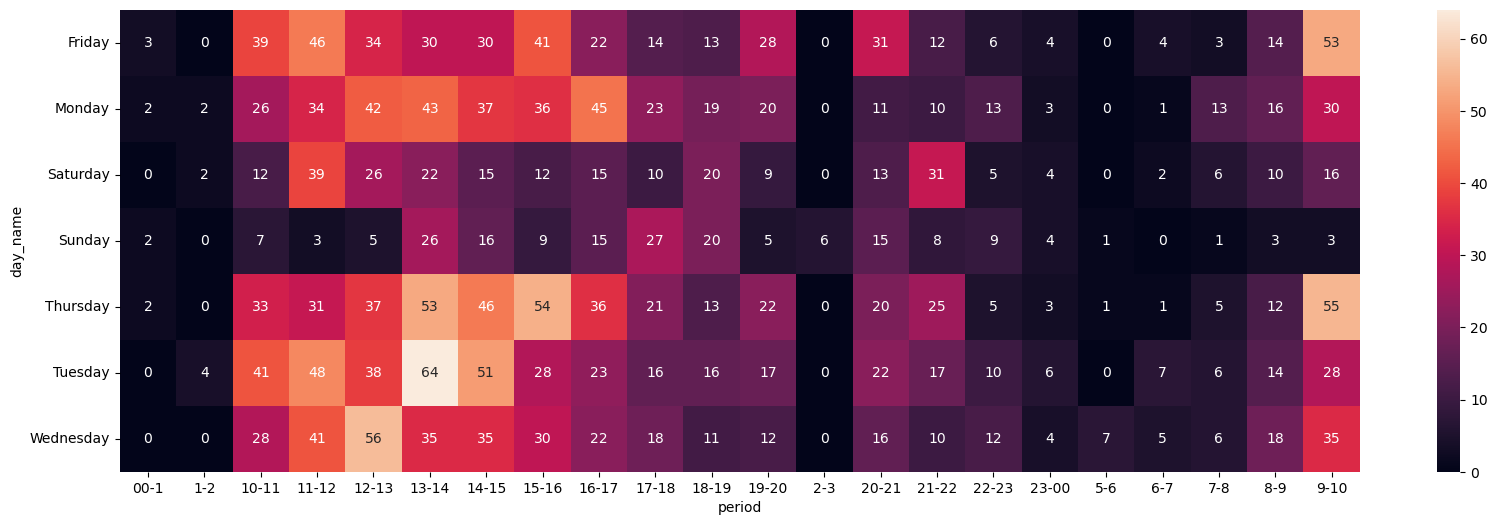

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot and assign it the alias 'plt'

plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0), annot=True)
plt.yticks(rotation='horizontal')
plt.show()